# Анализ данных из Росстат

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# загрузка данных
raw_data = pd.read_excel("data/cen-god.xls")
raw_data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,Средние потребительские цены по Российской Фед...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013.00,2014,2015,2016,2017,2018,2019,2020
2,Средние потребительские цены на отдельные виды...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04
4,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14
5,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55
6,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84
7,"Консервы мясные3), 350 г",8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,70.35,75.22,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5
8,Рыба мороженая неразделанная4),2.32,129.5,1088.73,3675.17,8325,9398,9912,18.93,23.83,...,86.79,85.67,90.79,110.65,138.16,147.68,153.03,152.14,170.13,181.08
9,"Рыба соленая, маринованная, копченая",5.72,272.6,2598.96,7495.95,17488,19912,21402,32.13,47.89,...,247.73,247.61,252.52,292.21,352.58,382.54,388.83,398.24,424.54,453.54


In [6]:
# удалили верхнюю строку по индексу
data_1 = raw_data.drop(0)
data_1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
1,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013.00,2014,2015,2016,2017,2018,2019,2020
2,Средние потребительские цены на отдельные виды...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04
4,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14
5,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55


In [7]:
# удаление строк с пустыми (NaN) значениями
data_1 = data_1.dropna()
data_1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
1,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013.00,2014,2015,2016,2017,2018,2019,2020
3,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04
4,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14
5,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55
6,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84


In [8]:
# строку с годами назначаем индексной строкой для столбцов
data_1.columns = data_1.loc[1, :]
data_1.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,         2013.0,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020],
      dtype='object', name=1)

In [9]:
data_1

1,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013.0,2014,2015,2016,2017,2018,2019,2020
1,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013.00,2014,2015,2016,2017,2018,2019,2020
3,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04
4,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14
5,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55
6,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,"Посещение детского ясли-сада, за день30)",0.59,17.34,249,955.52,2638,3805,4581,5.12,7.9,...,56.97,61.66,67.30,76.55,85.19,93.12,97.94,101.56,105.12,104.88
85,"Санаторий31), за день",30.17,618.53,10304,35615.39,90428,134568,168016,201.84,264.25,...,1726.5,1876.58,1990.25,2205.2,2521.46,2689.09,2782.9,2890.99,3118.21,3018.63
86,"Дом отдыха, пансионат32), за день",19.64,"360,03",6664,25380.81,60847,83494,118718,135.41,197.9,...,1365.2,1410.67,1499.03,1614.1,1789.74,1838.78,1869.65,1869.54,1937.53,2000.21
87,Первичный консультативный прием у врача-специа...,10.5,122.61,1614,7016.21,20704,29400,35055,41.9,52.67,...,381.03,422.52,494.47,555.94,610.84,668.09,683.9,724.61,780.86,810.75


In [10]:
data_1 = data_1.drop(1)
data_1.head()

1,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013.0,2014,2015,2016,2017,2018,2019,2020
3,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04
4,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14
5,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55
6,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84
7,"Консервы мясные3), 350 г",8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,70.35,75.22,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5


In [11]:
# приводим в порядок индексы столбцов:
# подправляем 2013 и приводим все значения в строковой тип
col_arr = np.array(data_1.columns)
col_arr

array([' ПОКАЗАТЕЛИ ', 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013.0, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=object)

In [12]:
col_arr[col_arr == 2013] = 2013
data_1.columns = col_arr.astype("str")
data_1.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [13]:
# транспонирование
data_2 = data_1.T
data_2.head()

,3,4,5,6,7,8,9,10,11,12,...,79,80,81,82,83,84,85,86,87,88
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,"360,03",122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [14]:
data_2.iloc[0, :]

3                     Говядина (кроме бескостного мяса)
4                      Свинина (кроме бескостного мяса)
5                        Куры охлажденные и мороженые1)
6                                     Колбаса вареная2)
7                              Консервы мясные3), 350 г
                            ...                        
84             Посещение детского ясли-сада, за день30)
85                               Санаторий31), за день 
86                   Дом отдыха, пансионат32), за день 
87    Первичный консультативный прием у врача-специа...
88                                Общий анализ крови33)
Name:  ПОКАЗАТЕЛИ , Length: 84, dtype: object

In [15]:
data_2.columns = data_2.iloc[0, :]
data_2 = data_2.drop(" ПОКАЗАТЕЛИ ")
data_2.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,"360,03",122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471


In [16]:
data_2.select_dtypes(include="object")

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,"360,03",122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471
1996,14137,16810,13815,22859,7375,9398,19912,8540,22968,8412,...,…,1184,12083,4617,9106,3805,134568,83494,29400,13922
1997,15787,19055,16061,26767,7811,9912,21402,8468,23238,9589,...,…,2449,15661,4948,12996,4581,168016,118718,35055,19491
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,…,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,…,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2,...,…,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99


In [17]:
data_2.select_dtypes(include="object").columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5) ', 'Масло подсолнечное 6) ',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, з

In [18]:
data_2["Корвалол, за 25 мл"].unique()

array(['…', 2623, 3.63, 4.08, 5.42, 5.17, 5.45, 5.49, 7.63, 7.61, 7.68,
       7.52, 10.56, 9.4, 8.72, 9.04, 10.11, 10.45, 11.23, 15.31, 17.97,
       17.59, 19.03, 21.61, 24.62], dtype=object)

In [19]:
# замена '…' на 0.0
data_3 = data_2.replace("…", 0.0)
data_3["Корвалол, за 25 мл"].unique()

array([   0.  , 2623.  ,    3.63,    4.08,    5.42,    5.17,    5.45,
          5.49,    7.63,    7.61,    7.68,    7.52,   10.56,    9.4 ,
          8.72,    9.04,   10.11,   10.45,   11.23,   15.31,   17.97,
         17.59,   19.03,   21.61,   24.62])

In [20]:
data_3.select_dtypes(include="object").columns

Index(['Еврошифер15), за 10 м2', 'Линолеум, за м2',
       'Кольцо обручальное золотое16), за грамм',
       'Бензин автомобильный марки А-76 (АИ-80)17), за л',
       'Постановка набоек, за пару',
       'Ремонт телевизоров цветного изображения18)  ',
       'Ремонт холодильников всех марок19)', 'Химчистка мужского костюма20)',
       'Стирка и глажение белья прямого21), за кг',
       'Стрижка модельная в женском зале22)',
       'Стрижка модельная в мужском зале', 'Рытье могилы23)',
       'Изготовление гроба', 'Проезд в городском автобусе, за поездку24)',
       'Проезд в трамвае, за поездку', 'Проезд в троллейбусе, за поездку',
       'Проезд в метро, за поездку',
       'Пересылка простого письма внутри России25), массой до 20 г ',
       'Отправка телеграммы обыкновенной внутренней26), за 15 слов',
       'Абонентская плата за неограниченный объем местных телефонных соединений, за месяц',
       'Плата за жилье в домах государственного и муниципального жилищных фондов27), за м2 

In [21]:
data_3['Еврошифер15), за 10 м2'].unique()

array([0.0, '...', 31986.77, 99732, 118529, 126831, 139.32, 213.93, 269.5,
       335.63, 398.32, 460.27, 508.15, 646.24, 734.86, 913.71, 1142.04,
       1144.83, 1154.66, 1232.19, 1289.04, 1368.75, 1425.95, 1494.21,
       1535.18, 2717.7, 2752.78, 2949.49, 3109.3], dtype=object)

In [22]:
data_3 = data_3.replace("...", 0.0)
data_3['Еврошифер15), за 10 м2'].unique()

array([     0.  ,  31986.77,  99732.  , 118529.  , 126831.  ,    139.32,
          213.93,    269.5 ,    335.63,    398.32,    460.27,    508.15,
          646.24,    734.86,    913.71,   1142.04,   1144.83,   1154.66,
         1232.19,   1289.04,   1368.75,   1425.95,   1494.21,   1535.18,
         2717.7 ,   2752.78,   2949.49,   3109.3 ])

In [23]:
data_2['Еврошифер15), за 10 м2'].unique()

array(['…', '...', 31986.77, 99732, 118529, 126831, 139.32, 213.93, 269.5,
       335.63, 398.32, 460.27, 508.15, 646.24, 734.86, 913.71, 1142.04,
       1144.83, 1154.66, 1232.19, 1289.04, 1368.75, 1425.95, 1494.21,
       1535.18, 2717.7, 2752.78, 2949.49, 3109.3], dtype=object)

In [24]:
data_3.select_dtypes(include="object").columns

Index(['Бензин автомобильный марки А-76 (АИ-80)17), за л',
       'Постановка набоек, за пару',
       'Ремонт телевизоров цветного изображения18)  ',
       'Ремонт холодильников всех марок19)', 'Химчистка мужского костюма20)',
       'Стирка и глажение белья прямого21), за кг',
       'Стрижка модельная в женском зале22)',
       'Стрижка модельная в мужском зале', 'Рытье могилы23)',
       'Изготовление гроба', 'Проезд в городском автобусе, за поездку24)',
       'Проезд в трамвае, за поездку', 'Проезд в троллейбусе, за поездку',
       'Проезд в метро, за поездку',
       'Пересылка простого письма внутри России25), массой до 20 г ',
       'Отправка телеграммы обыкновенной внутренней26), за 15 слов',
       'Абонентская плата за неограниченный объем местных телефонных соединений, за месяц',
       'Плата за жилье в домах государственного и муниципального жилищных фондов27), за м2 общей площади',
       'Водоснабжение холодное и водоотведение, за месяц с человека',
       'Горячее 

In [25]:
data_3["Бензин автомобильный марки А-76 (АИ-80)17), за л"].unique()

array([0.51, 27.8, 175.59, 595.76, 1681, 1805, 1827, 1.96, 5.75, 7.35,
       6.52, 7.58, 9.06, 12.46, 14.32, 15.75, 17.01, 17.41, 19.16, 20.09,
       24.65, 26.56, 27.91, 30.41, 32.23, 33.59, 35.22, '-'], dtype=object)

In [26]:
# замена '-' на 0.0
data_3 = data_3.replace("-", 0.0)
data_3["Бензин автомобильный марки А-76 (АИ-80)17), за л"].unique()

array([5.1000e-01, 2.7800e+01, 1.7559e+02, 5.9576e+02, 1.6810e+03,
       1.8050e+03, 1.8270e+03, 1.9600e+00, 5.7500e+00, 7.3500e+00,
       6.5200e+00, 7.5800e+00, 9.0600e+00, 1.2460e+01, 1.4320e+01,
       1.5750e+01, 1.7010e+01, 1.7410e+01, 1.9160e+01, 2.0090e+01,
       2.4650e+01, 2.6560e+01, 2.7910e+01, 3.0410e+01, 3.2230e+01,
       3.3590e+01, 3.5220e+01, 0.0000e+00])

In [27]:
data_3.select_dtypes(include="object").columns

Index(['Постановка набоек, за пару',
       'Ремонт телевизоров цветного изображения18)  ',
       'Ремонт холодильников всех марок19)', 'Химчистка мужского костюма20)',
       'Стирка и глажение белья прямого21), за кг',
       'Стрижка модельная в женском зале22)',
       'Стрижка модельная в мужском зале', 'Рытье могилы23)',
       'Изготовление гроба', 'Проезд в городском автобусе, за поездку24)',
       'Проезд в трамвае, за поездку', 'Проезд в троллейбусе, за поездку',
       'Проезд в метро, за поездку',
       'Пересылка простого письма внутри России25), массой до 20 г ',
       'Отправка телеграммы обыкновенной внутренней26), за 15 слов',
       'Абонентская плата за неограниченный объем местных телефонных соединений, за месяц',
       'Плата за жилье в домах государственного и муниципального жилищных фондов27), за м2 общей площади',
       'Водоснабжение холодное и водоотведение, за месяц с человека',
       'Отопление28), за м2 общей площади', 'Газ сетевой, за месяц с челове

In [28]:
data_3["Постановка набоек, за пару"].unique()

array([4.75, 92.17, 1683, 5498.27, 11532, 15024, 17168, 21.15, 28.7,
       36.42, 45.1, 56.28, 66.96, 79.6, 93.12, 105.53, 121.67, 145.52,
       166.34, '180,16', 212.25, 228.73, 241.94, 260.75, 290.62, 318.79,
       325.66, 330.22, 342.9, 351.59], dtype=object)

In [51]:
# замена запятой внутри значений на точку
data_3 = data_3.replace(",", ".", regex=True)
data_3["Постановка набоек, за пару"].unique()

array([4.75, 92.17, 1683, 5498.27, 11532, 15024, 17168, 21.15, 28.7,
       36.42, 45.1, 56.28, 66.96, 79.6, 93.12, 105.53, 121.67, 145.52,
       166.34, '180.16', 212.25, 228.73, 241.94, 260.75, 290.62, 318.79,
       325.66, 330.22, 342.9, 351.59], dtype=object)

In [30]:
data_4 = data_3.astype("float")

In [31]:
data_4.select_dtypes(include="object").columns

Index([], dtype='object', name=' ПОКАЗАТЕЛИ ')

In [32]:
data_4.head(10)

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1991,15.54,14.38,13.57,17.00,8.87,2.32,5.72,3.91,12.24,5.48,...,0.0,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.50,4.54
1992,221.50,260.00,194.76,271.00,163.90,129.50,272.60,120.00,413.00,190.00,...,0.0,3.40,35.10,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.30,1165.48,1088.73,2598.96,1040.71,2912.58,1364.90,...,0.0,29.00,595.00,498.00,498.00,249.00,10304.00,6664.00,1614.00,777.00
1994,5186.28,6579.38,5677.09,8984.10,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,0.0,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547.00,15053.00,11587.00,20016.00,6692.00,8325.00,17488.00,8050.00,20075.00,10460.00,...,0.0,951.00,8077.00,3886.00,6185.00,2638.00,90428.00,60847.00,20704.00,10471.00
1996,14137.00,16810.00,13815.00,22859.00,7375.00,9398.00,19912.00,8540.00,22968.00,8412.00,...,0.0,1184.00,12083.00,4617.00,9106.00,3805.00,134568.00,83494.00,29400.00,13922.00
1997,15787.00,19055.00,16061.00,26767.00,7811.00,9912.00,21402.00,8468.00,23238.00,9589.00,...,0.0,2449.00,15661.00,4948.00,12996.00,4581.00,168016.00,118718.00,35055.00,19491.00
1998,30.04,33.99,30.74,43.81,15.50,18.93,32.13,13.85,64.44,23.43,...,0.0,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.90,24.40
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,0.0,4.31,25.40,13.09,25.12,7.90,264.25,197.90,52.67,31.22
2000,52.72,58.45,48.80,77.97,19.52,29.54,61.22,21.15,69.12,23.20,...,0.0,5.66,39.16,23.11,33.60,9.19,351.35,279.76,62.97,37.99


In [33]:
data_4.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5) ', 'Масло подсолнечное 6) ',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, з

In [34]:
# удаление лишних символов пробела из ключей столбцов
data_4.columns = data_4.columns.str.strip(" ")
data_4.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5)', 'Масло подсолнечное 6)',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, за л

In [35]:
# очищенный датафрейм можно сохранить в виде эксель-таблицы
data_4.to_excel("data/rosstat_data.xlsx")

In [61]:
# Анализ данных

data_4["Телевизор цветного изображения"].min()

2161.0

In [37]:
data_4["Телевизор цветного изображения"].max()

2148881.0

In [38]:
data_4["Телевизор цветного изображения"]

1991       2161.00
1992      75721.20
1993     401573.97
1994     998803.75
1995    1808916.00
1996    1990745.00
1997    2148881.00
1998       5622.84
1999       6148.16
2000       6656.92
2001       7811.84
2002       8166.64
2003       7914.32
2004       7728.89
2005       7601.63
2006       7794.71
2007       7667.66
2008       8049.80
2009      10563.54
2010      11400.39
2011      13554.47
2012      14189.09
2013      15144.74
2014      19047.78
2015      22529.29
2016      22999.51
2017      22570.80
2018      22958.88
2019      22134.51
2020      27357.88
Name: Телевизор цветного изображения, dtype: float64

In [39]:
# сколько раз изменилась средняя цена на определённую категорию
data_4.loc["2020", "Телевизор цветного изображения"] / data_4.loc["1998", "Телевизор цветного изображения"]

4.865491459831687

In [40]:
categ = "Говядина (кроме бескостного мяса)"
data_4.loc["2020", categ] / data_4.loc["1998", categ]

12.018641810918776

In [41]:
categ = "Электроэнергия в квартирах  без электроплит за минимальный объем потребления29), за 100 кВт·ч"
data_4.loc["2020", categ] / data_4.loc["1998", categ]

24.325336454066708

In [42]:
categ = "Кольцо обручальное золотое16), за грамм"
data_4.loc["2020", categ] / data_4.loc["1998", categ]

18.740089013434435

In [43]:
# извлекаем года для временной шкалы по оси x, 
# и попутно сконвертируем их в целочисленный тип
years = np.array(data_4.index).astype("int")
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [44]:
data_4.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5)', 'Масло подсолнечное 6)',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, за л

In [45]:
def f1(data, key):
    return data.loc["1998":, key]

In [46]:
# извлекаем данные по ценам
col_1 = f1(data_4, "Говядина (кроме бескостного мяса)")
col_2 = f1(data_4, "Кольцо обручальное золотое16), за грамм")
col_3 = f1(data_4, "Электроэнергия в квартирах  без электроплит за минимальный объем потребления29), за 100 кВт·ч")
col_4 = f1(data_4, "Мука пшеничная")
col_5 = f1(data_4, "Кирпич красный, за 1000 шт.")
col_6 = f1(data_4, "Кинотеатры, за билет")
col_7 = f1(data_4, "Общий анализ крови33)")

In [47]:
years[years >= 1998]

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

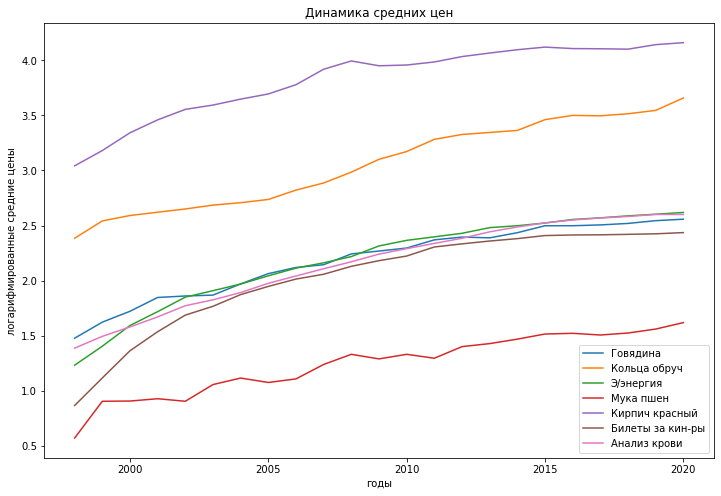

In [58]:
# визуализация данных

plt.figure(figsize=(12, 8))

plt.plot(years[years >= 1998], np.log10(col_1), label="Говядина")
plt.plot(years[years >= 1998], np.log10(col_2), label="Кольца обруч")
plt.plot(years[years >= 1998], np.log10(col_3), label="Э/энергия")
plt.plot(years[years >= 1998], np.log10(col_4), label="Мука пшен")
plt.plot(years[years >= 1998], np.log10(col_5), label="Кирпич красный")
plt.plot(years[years >= 1998], np.log10(col_6), label="Билеты за кин-ры")
plt.plot(years[years >= 1998], np.log10(col_7), label="Анализ крови")

plt.legend()
plt.xlabel("годы")
plt.ylabel("логарифмированные средние цены")
plt.title("Динамика средних цен")

plt.show()